In [1]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score


In [2]:
data1 = make_blobs(n_samples=10000,n_features=2,centers=8,random_state=42)
data = data1[0]

In [5]:
import warnings 
warnings.filterwarnings('ignore')

In [6]:
k_values = range(2, 11)
models = [KMeans(n_clusters=k, random_state=42,n_init='auto').fit(data) for k in k_values]
sse_values = [round(model.inertia_) for model in models]
labels = [model.labels_ for model in models]
sil_score = [silhouette_score(data,label) for label in labels]
print('Optimal K :',k_values[np.argmax(sil_score)])
print('Silhouette score:',sil_score)
print('Squared Error:',sse_values)
delta_sse = np.diff(sse_values)
print('Delta SSE:',delta_sse)
optimal_k_index = np.argmin(delta_sse)
optimal_k = k_values[optimal_k_index] + 2
print("Optimal value of K:", optimal_k)

Optimal K : 5
Silhouette score: [0.5003269965628466, 0.6703551368083186, 0.712286018110894, 0.7284283284865528, 0.6976386256778243, 0.5635279029923993, 0.494657333934502, 0.4998654313638202, 0.46473512572534176]
Squared Error: [392095, 141276, 68304, 30703, 23192, 21295, 17606, 16445, 15595]
Delta SSE: [-250819  -72972  -37601   -7511   -1897   -3689   -1161    -850]
Optimal value of K: 4


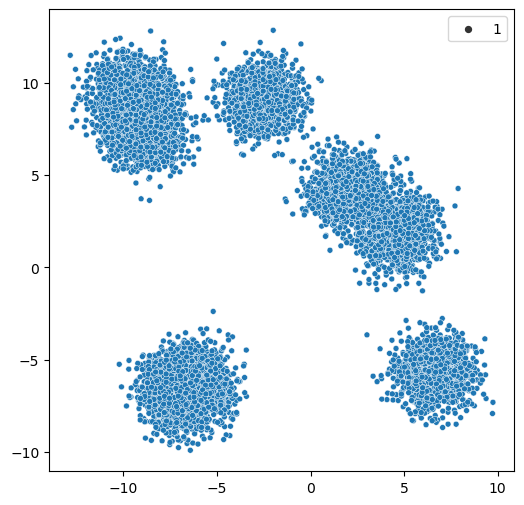

In [74]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=data[:,0],y=data[:,1],size=1)
plt.show()

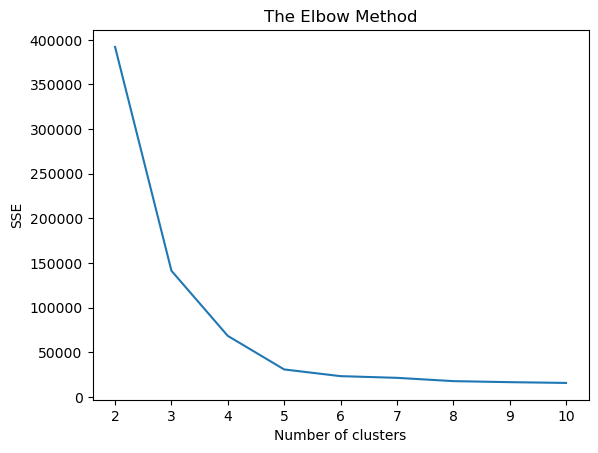

In [73]:
# plt.figure(figsize=(4,3))
plt.plot(range(2, 11), sse_values)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#### Observation : Both Silhouette Score and Elbow Method are suitable for identifying optimal value of K but as visualization is not available it is a little bit difficult to find optimal value of K using Elbow method ( Numerical Approach based on its intuition ) and Silhouette Score is working perfectly on the other hand Silhouette Score took much more time than elbow method for identifying optimal value of K 

#### Task : Decide which should be considered 

In [ ]:
k_values = range(2, 11)
models = [KMeans(n_clusters=k, random_state=42,n_init='auto').fit(filtered_data) for k in k_values]
labels = [model.labels_ for model in models]
sil_score = [silhouette_score(data,label) for label in labels]
optimal_k = k_values[np.argmax(sil_score)]